In [1]:
gap('LoadPackage("numericalsgps")')

true

In [2]:
S = 'NumericalSemigroup( 11, 12, 13, 32, 53 )'
Apery_S = f'AperyListOfNumericalSemigroupWRTElement({S},11)'
Lista_Apery = gap(f'{Apery_S}')
Lista_Vertices = gap(f'AperyListOfNumericalSemigroupAsGraph({Apery_S})')
print(Lista_Apery, Lista_Vertices)

[ 0, 12, 13, 25, 26, 38, 39, 51, 52, 53, 32 ] [ ,,,,,,,,,,, [ 12, 25, 38, 51 ], [ 13, 25, 26, 38, 39, 51, 52 ],,,,,,,,,,,, 
  [ 25, 38, 51 ], [ 26, 38, 39, 51, 52 ],,,,,, [ 32 ],,,,,, [ 38, 51 ], 
  [ 39, 51, 52 ],,,,,,,,,,,, [ 51 ], [ 52 ], [ 53 ] ]


In [3]:
import re
def leaveOne(s, char):  
    return re.sub(r'((%s\s?)){2,}' % char, r'\1' , s)

def convertir_lista_vecinos(lista_movimientos):
    return {sub[0]: sub[1:] for sub in lista_movimientos}

def limpiar_string_mov(original_string):
    foo = [pos for pos, char in enumerate(original_string) if char in ["[","]"]]
    new_string = ""
    for n in range(len(foo)-1):
        if original_string[foo[n]] == "[" and original_string[foo[n+1]]=="[":
            new_string += original_string[foo[n]:foo[n+1]].replace(",","")
            new_string += original_string[foo[n+1]:foo[n+2]]
        elif original_string[foo[n]] == "]" and original_string[foo[n+1]]=="[":
            new_string += leaveOne(original_string[foo[n]:foo[n+1]],",")
            new_string += original_string[foo[n+1]:foo[n+2]]
        elif original_string[foo[n]] == "]" and original_string[foo[n+1]]=="]":
            new_string += original_string[foo[n]:foo[n+1]].replace(",","")
            new_string += original_string[foo[n+1]:foo[n+1]+1]
    return convertir_lista_vecinos(sage_eval(new_string))

In [4]:
limpiar_string_mov(str(Lista_Vertices))

{12: [25, 38, 51],
 13: [25, 26, 38, 39, 51, 52],
 25: [38, 51],
 26: [38, 39, 51, 52],
 32: [],
 38: [51],
 39: [51, 52],
 51: [],
 52: [],
 53: []}

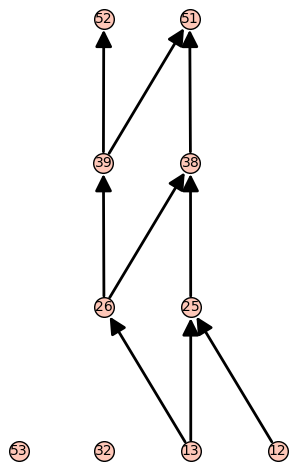

In [8]:
D = DiGraph(limpiar_string_mov(str(Lista_Vertices)))
P = Poset(D)
P.show()

In [6]:
P.maximal_elements()

[53, 32, 52, 51]

In [7]:
print([u-11 for u in P.maximal_elements()],gap(f'PseudoFrobenius({S})'))

[42, 21, 41, 40] [ 21, 40, 41, 42 ]
